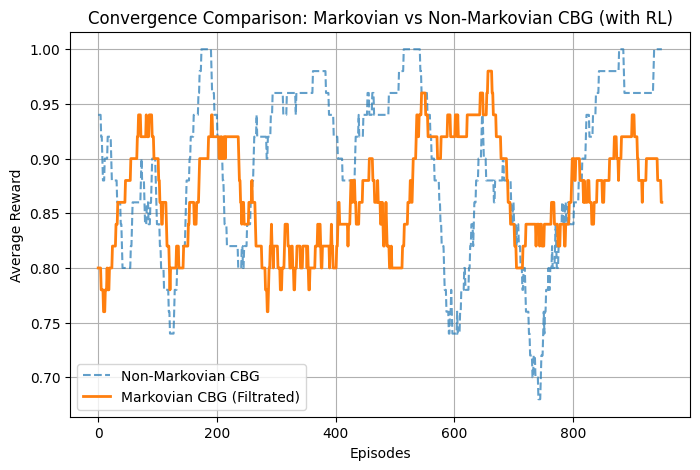

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
num_agents = 5
num_episodes = 1000
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1  # Exploration rate

# Initialize Q-values for both Markovian and Non-Markovian settings
Q_non_markov = np.random.rand(num_agents, num_agents) * 0.01  # Small random values
Q_markov = np.random.rand(num_agents, num_agents, num_agents) * 0.01  # Includes history

# Reward tracking
rewards_non_markov = []
rewards_markov = []

# Epsilon-greedy action selection function
def select_action(q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(len(q_values))  # Explore
    return np.argmax(q_values)  # Exploit

# Simulation loop with learning
for episode in range(num_episodes):
    # Non-Markovian Case
    state = np.random.choice(num_agents)  # Random proposing agent
    proposed_coalition = np.random.choice(num_agents, size=2, replace=False)  # Random proposal

    # Epsilon-greedy selection for acceptance
    accept = np.random.rand() < (0.5 + 0.5 * select_action(Q_non_markov[state], epsilon))

    if accept:
        reward = 1.0
        Q_non_markov[state, proposed_coalition[0]] += learning_rate * (
            reward + discount_factor * np.max(Q_non_markov[proposed_coalition[0], :]) -
            Q_non_markov[state, proposed_coalition[0]]
        )
    else:
        reward = 0.0

    rewards_non_markov.append(reward)

    # Markovian Case (With Filtration)
    filtration = tuple(proposed_coalition)  # Store past proposals

    # Epsilon-greedy selection for acceptance
    accept = np.random.rand() < (0.5 + 0.5 * select_action(Q_markov[state, proposed_coalition[0]], epsilon))

    if accept:
        reward = 1.0
        Q_markov[state, proposed_coalition[0], proposed_coalition[1]] += learning_rate * (
            reward + discount_factor * np.max(Q_markov[proposed_coalition[0], :, :]) -
            Q_markov[state, proposed_coalition[0], proposed_coalition[1]]
        )
    else:
        reward = 0.0

    rewards_markov.append(reward)

# Compute moving average for smoother curves
window = 50
rewards_non_markov_avg = np.convolve(rewards_non_markov, np.ones(window)/window, mode='valid')
rewards_markov_avg = np.convolve(rewards_markov, np.ones(window)/window, mode='valid')

# Plot Convergence
plt.figure(figsize=(8, 5))
plt.plot(rewards_non_markov_avg, label="Non-Markovian CBG", linestyle="dashed", alpha=0.7)
plt.plot(rewards_markov_avg, label="Markovian CBG (Filtrated)", linewidth=2)
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Convergence Comparison: Markovian vs Non-Markovian CBG (with RL)")
plt.legend()
plt.grid(True)
plt.show()
